# STA209 Final

Ruoyan Yin
916666619

## Problem 1:

### Part a
$x^{(k)}$ is not neccessarily converges to $x^*$ as $k\rightarrow\infty$. The counterexample given below can show the conclusion:

Suppose $f(x)=(x + 1)^2$ whose  minimum point is $x^* = -1$. It is obviously a strictly convex function. Then generate the sequence by  $x^{(k)}=\frac{1}{k}$, and we will have:
$$
f(x^{k+1}) = (\frac{1}{(k+1)} + 1)^2 <  (\frac{1}{k} + 1)^2 = f(x^{k})
$$
However, this sequence will only converge to $x = 0$ instead of the minimum point.

### Part b

The convergence rate for the algorthm would be superlinear. The reason is that from the condition we have:
$$
\epsilon_k = f(x^{(k)}) - f(x^{*}) \leq \frac{f(x^{(0)}) - f(x^*)}{k^2}
$$
Which indicates that to obtain the specific error $\epsilon$, we have to run $\sqrt{\frac{1}{\epsilon}}$ iterations and this is faster than a linear speed. So this is a suplinear rate.

### Part c
-Convexity:

I will prove the convexity by checking the defination of convexity of function. For any 2 points $x, y(x\leq y)$ in $dom\, f$:

1. $if\,\, x \geq 1, y\geq1$: $f(x) = f(y) = 0$, 

    $f(\alpha x + (1 - \alpha)y) = 0 = \alpha f(x)+(1-\alpha)f(y)\\
    \text{Since} \,\alpha x + (1 - \alpha)y\,\, \text{stands for any points in between} \,x\, \text{and} \,y.$

2. $if \,\, x < 1, y < 1$: $f(x)=1-x, f(y)= 1-y $ 

    $\alpha f(x)+(1-\alpha)f(y) = \alpha (1-x) + (1 - \alpha )(1-y) \\ $
    $f(\alpha x + (1 - \alpha)y) = 1 - \alpha x - (1 - \alpha)y = f(x)+(1-\alpha)f(y)$. 

3. $if \,\, x<1, y\geq1: f(x) = 1-x, \, f(y) = 0 $

    $\alpha f(x) + (1 - \alpha)f(y) = \alpha (1 - x)$

    $f(\alpha x + (1 - \alpha) y ) = max\{1 - \alpha x - (1-\alpha)y, \, 0 \}$

    $1 - \alpha x - (1-\alpha)y \leq 1-\alpha x (1-\alpha) \,\, (y \geq 1) = \alpha (1 - x)$
    
    So: $\alpha (1 - x) > 0, \, \text{and} \, \alpha (1-x) \geq 1 - \alpha x - (1-\alpha)y$

    Hence: $\alpha f(x) + (1 - \alpha)f(y) = \alpha(1 - x) \geq max\{ 1 - \alpha x - (1-\alpha)y, \, 0\} = f(\alpha x + (1 - \alpha) y )$

Therefore the function is convex.

-Subderivative:

The non-continuous point of $f(x)$ is when $x = 1$, and: $f^\prime (1_+) = 0$, $f^\prime (1_-) = -1$

Therefore:

$$
\partial f = \begin{cases}
-1, \quad &x < 1\\
[-1, 0], \quad  &x = 1\\
0, \quad &x>1
\end{cases}
$$

Because $0 \in \partial f$, there exists a minimum.


### Part d
Denote: 

$h(x) = f(x^{(k)}) + \nabla f(x^{(k)})(x - x^{(k)}) + \frac{1}{t^{(k)}} ||(x - x^{(k)})||^2_2$

So the partial derivative of $h(x)$ with respect to x is: 

$\frac{\partial h(x)}{\partial x} = \nabla f(x^{(x)}) + \frac {1}{t^{(k)}} (x - x^{(k)})$

Then set the partial derivative to be zero:

$x = x^{(k)} - t^{(k)}\nabla f(x^{(k)})$

So two equations are equivalent.

## Problem 2:

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import norm, inv
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
x = np.asarray(pd.read_csv('X_baseball', sep = '\s+', header = None))
y = np.asarray(pd.read_csv('y_baseball', sep = '\s+', header = None))

In [3]:
def f(beta, l = 1):
    '''
    This is the function to calculate the objective function value.
    Input: The current beta
    Output: Function value
    '''
    n = x.shape[0]
    return 1/ (2*n) * norm(y - x@beta)**2 + l * norm(beta, 1)

def softThreshold(x, l = 1):
    temp = np.abs(x) - l
    if temp >= 0:
        return np.sign(x) * temp
    elif temp < 0:
        return 0

### Before the Algorithm
To update $\hat{\beta}_j$ for the Lasso regression, I used the soft-thresholding operator mentioned in lecture notes meaning:

$$\hat{\beta}_j \leftarrow S_\lambda (\hat{\beta}_j + N^{-1} x_j^T r)$$

Where:

$$S_\lambda (x) = sign(x)(|x| - \lambda)_+$$


### Cyclic cordinate descent:
#### Part a: Implement algorithm

In [4]:
## Part a: Implement the algorithm:
def cyclicCD(max_iter = 10**4, l = 1):
    '''
    This function apply the cyclic cordinate desent to find the minimum.
    
    Input:
    max_iter: The maximum iterations.
    l: The penalty term used in the Lasso.

    Return:
    bs: List of b along all the iterations.
    fs: List of fuction values along the iterations.
    '''
    N, p = x.shape
    b = np.zeros((p,1))

    bs = []
    fs = []

    for k in tqdm(range(max_iter)):
        temp_f = f(b)
        
        ## Pick one index to update:
        j = k % p
        ## Update the corresponding direction:
        r = y - x @ b
        b[j] = softThreshold(b[j] + 1/N * x[:, j] @ r, l = l)

        fs.append(temp_f)
        bs.append(b)

    return bs, fs


In [5]:
bs_ccd1, fs_ccd1 = cyclicCD(max_iter= 10**4, l = 1)

100%|██████████| 10000/10000 [00:00<00:00, 21646.47it/s]


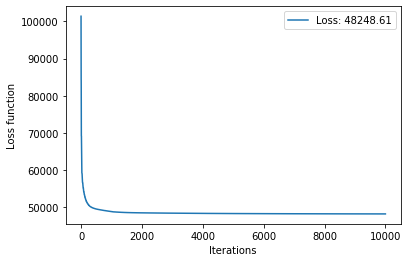

In [6]:
# Visualize the outcome:
plt.plot(fs_ccd1, label = 'Loss: %.2f'%fs_ccd1[-1])
plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.legend()
plt.show()

As the plot indicates, the number of iterations that the obejective function takes to converge is much less than $10^4$. It is even much less than 2,000. And after all the iterations, the final loss is 48248.61 which initially was greater than 100,000.

#### Part b: Get the OLS solution by setting $\lambda = 0$

In [7]:
def mylm(x, y):
    '''
    This function calculate the OLS solution by using its close form.
    '''
    return inv(x.T @ x) @ x.T @ y

In [8]:
## Get the OLS solution by setting l = 0
bs_ccd0, fs_ccd0 = cyclicCD(max_iter=10**4, l = 0)

100%|██████████| 10000/10000 [00:00<00:00, 21553.91it/s]


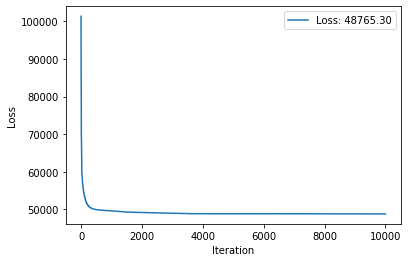

In [9]:
plt.plot(fs_ccd0, label = 'Loss: %.2f'%fs_ccd0[-1])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
b_ols = mylm(x, y)
norm(bs_ccd0[-1] - b_ols)

228.65029337636457

The Euclidean distance between $\widehat{\beta}_K$ and $\hat{\beta}_{OLS}$ is 228.65029337636457

#### Part c: Run CCD using different $\lambda s$

In [11]:
ls = [1, 10, 20]
numofZero = []
for l in ls:
    bs, fs = cyclicCD(l = l)
    numofZero.append((sum(bs[-1] == 0)[0]))

100%|██████████| 10000/10000 [00:00<00:00, 22582.90it/s]


In [12]:
numofZero

[2, 10, 13]

As we can see, more penalty($\lambda$) put on the L1 norm of $\beta$, more sparse $\hat{\beta}_K$ will be meaning more zeros it will have.

### Random Cordinate Descent
#### Part a: Inplement algorithm

In [13]:
def randomCD( max_iter = 10**4, l = 1, random_state = None):
    '''
    This function apply the random cordinate desent to find the minimum.
    
    Input:
    max_iter: The maximum iterations.
    l: The penalty term used in the Lasso.

    Return: Optimal Beta. A column vector.
    '''
    N, p = x.shape
    b = np.zeros((p,1))

    ## Set the random state
    if random_state:
        np.random.seed(random_state)
    ## Generate the random sequence to update beta
    J = np.random.randint(low = 0, high = p-1, size = max_iter)

    bs = []
    fs = []
    for k in tqdm(range(max_iter)):
        temp_f = f(b)
        
        j = J[k]
        r = y - x@b
        b[j] = softThreshold(b[j] + 1/N * x[:, j] @ r, l = l)

        bs.append(b)
        fs.append(temp_f)

    return bs, fs


In [14]:
## Setting the random seed so the result will be reproducible
bs_rcd1, fs_rcd1 = randomCD(max_iter = 10**4, l = 1, random_state = 256)
fs_rcd1[-1]

100%|██████████| 10000/10000 [00:00<00:00, 20788.16it/s]


48248.067063436945

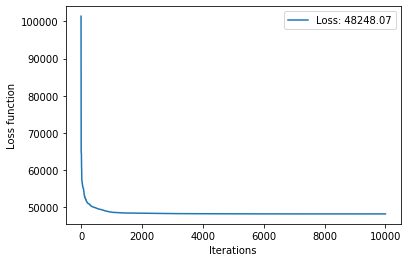

In [15]:
plt.plot(fs_rcd1, label = 'Loss: %.2f'%fs_rcd1[-1])
plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.legend()
plt.show()

The performance of random cordinate descent is similar to it of cyclic cordinate descent: it did not take more than 2,000 steps to converge and the loss was 48248.067063436945.

#### Part b: Get the OLS solution by setting $\lambda = 0$

In [16]:
bs_rcd0, fs_rcd0 = randomCD(max_iter = 10**4, l = 0, random_state = 233)
norm(bs_rcd0[-1] - b_ols)

100%|██████████| 10000/10000 [00:00<00:00, 20609.16it/s]


50.64290260009131

By using random cordinate descent, the Euclidean distance between the solution and the one solved by close form is 50.64290260009131. So with respect to the Euclidean distance, random cordinate descent should perform better than cyclic cordinate descent.

### Comparison of cyclic coordinate descent and random coordinate descent

In [17]:
## Get two estimations:
bs_ccd, fs_ccd = cyclicCD(max_iter= 10**2, l = 10)
bs_rcd, fs_rcd = randomCD(max_iter= 10**2, l = 10, random_state = 777)

100%|██████████| 100/100 [00:00<00:00, 15194.00it/s]


To get the minimum value, I will just use the minimum value of both methods and set K = 10^4 

In [18]:
_, fs_ccd_ = cyclicCD(max_iter= 10**2, l = 10)
_, fs_rcd_ = randomCD(max_iter= 10**2, l = 10, random_state = 999)
f_min = min(fs_rcd_[-1], fs_ccd_[-1])

100%|██████████| 100/100 [00:00<00:00, 17351.91it/s]


In [19]:
plt.plot(np.log(fs_ccd - f_min), label = 'log error using CCD')
plt.plot(np.log(fs_rcd - f_min), label = 'log error using RCD')
plt.xlabel('Iterations')
plt.ylabel('Log error')
plt.legend()
plt.show()

As the log-error plot indicater, using cyclic cordinate descent leads to a better performance. The log error decrease significant faster than using random cordinate descent and converge to the minum less than 100 iterations.